### Pre-processing the Text in Natural Language Processing
- Part 1: Persian Dataset (Hazm)
- Part 2: English Dataset (Nltk) <-

### Required Libraries

In [39]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Read English Text File

In [40]:
with open('Datasets/hp_en.txt', 'r', encoding='utf-8') as file:
    text = file.read()

### Tokenize Text into Sentences

In [41]:
sentences = nltk.sent_tokenize(text)

In [42]:
print(sentences)

['\ufeff.', 'http://www.google.com CHAPTER ONE THE BOY WHO LIVED \n\nMr. and Mrs. Dursley, of number four (4), Privet Drive, were proud to say that they were perfectly normal, thank you very much.', "They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.", '33 \n\nMr. Dursley was the director of a firm called Grunnings, which made drills.', 'He was a big, beefy man with hardly any neck, although he did have a very large mustache.', 'Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.', 'The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.', '66\n\nThe Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.', "They didn't think they could bear it if anyon

### Convert Uppercase Letters to Lowercase

In [43]:
sentences_lower = [sentence.lower() for sentence in sentences]

### Tokenize Sentences into Words

In [44]:
tokenized_words = [nltk.word_tokenize(sentence) for sentence in sentences_lower]

### Remove numbers and URLs

In [45]:
def remove_urls_and_numbers(words):
    cleaned_words = []
    for word in words:
        if 'http' not in word and 'www' not in word and not any(char.isdigit() for char in word):
            cleaned_words.append(word)
    return cleaned_words

cleaned_tokenized_words = [remove_urls_and_numbers(words) for words in tokenized_words]

In [46]:
print(cleaned_tokenized_words)

[['\ufeff', '.'], [':', 'chapter', 'one', 'the', 'boy', 'who', 'lived', 'mr.', 'and', 'mrs.', 'dursley', ',', 'of', 'number', 'four', '(', ')', ',', 'privet', 'drive', ',', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal', ',', 'thank', 'you', 'very', 'much', '.'], ['they', 'were', 'the', 'last', 'people', 'you', "'d", 'expect', 'to', 'be', 'involved', 'in', 'anything', 'strange', 'or', 'mysterious', ',', 'because', 'they', 'just', 'did', "n't", 'hold', 'with', 'such', 'nonsense', '.'], ['mr.', 'dursley', 'was', 'the', 'director', 'of', 'a', 'firm', 'called', 'grunnings', ',', 'which', 'made', 'drills', '.'], ['he', 'was', 'a', 'big', ',', 'beefy', 'man', 'with', 'hardly', 'any', 'neck', ',', 'although', 'he', 'did', 'have', 'a', 'very', 'large', 'mustache', '.'], ['mrs.', 'dursley', 'was', 'thin', 'and', 'blonde', 'and', 'had', 'nearly', 'twice', 'the', 'usual', 'amount', 'of', 'neck', ',', 'which', 'came', 'in', 'very', 'useful', 'as', 'she', 'spent', 'so',

### Remove Punctuations and Special Characters

In [47]:
cleaned_words_no_punct = []
for words in cleaned_tokenized_words:
    cleaned_words_no_punct.append([word for word in words if word.isalnum()])

### Remove Stopwords

In [48]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{"you're", 'to', 't', 's', 're', 'himself', 'some', 'if', 'been', 've', 'ain', 'ours', 'below', 'yourself', 'down', 'each', 'but', 'them', 'her', 'who', 'this', 'that', 'until', 'itself', 'before', 'it', 'out', 'hadn', 'mustn', "you've", 'll', 'shouldn', "won't", 'is', 'so', 'can', 'the', "you'd", 'because', "shan't", 'being', "she's", "doesn't", "hadn't", 'yourselves', 'above', 'such', "isn't", 'weren', 'should', "shouldn't", 'themselves', 'for', 'yours', 'there', 'am', "should've", 'mightn', 'then', 'ma', "don't", 'after', "that'll", 'he', 'while', "didn't", 'you', 'again', 'and', "haven't", 'd', 'does', 'has', 'once', 'where', 'their', 'which', 'at', 'under', 'don', 'all', 'haven', 'with', 'be', 'were', 'they', 'more', 'few', 'him', 'isn', 'was', "it's", "wasn't", 'only', 'aren', "mustn't", "you'll", 'than', 'y', 'any', 'other', 'its', 'an', 'his', 'whom', 'doing', 'shan', "couldn't", 'now', 'our', 'about', 'didn', 'those', 'theirs', 'couldn', 'here', 'by', 'through', 'wouldn', 'ove

In [49]:
cleaned_words_no_stopwords = []
for words in cleaned_words_no_punct:
    cleaned_words_no_stopwords.append([word for word in words if word not in stop_words])

### WordCloud

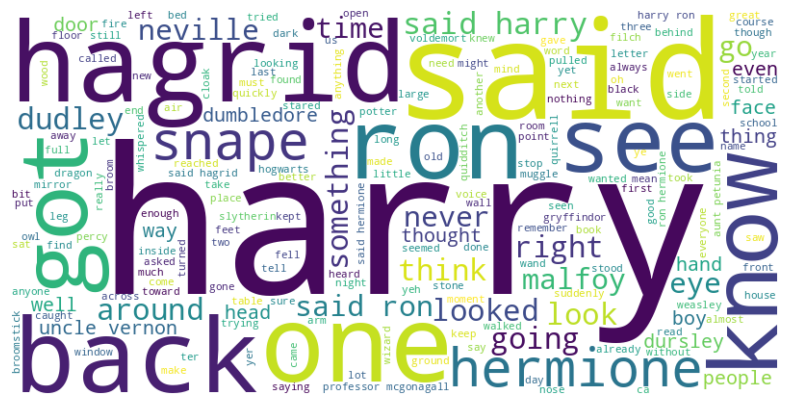

In [50]:
text = ' '.join([' '.join(words) for words in cleaned_words_no_stopwords])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()